# Real or Not? NLP with Disaster Tweets

_Predict which Tweets are about real disasters and which ones are not_

In [7]:
# Settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

In [53]:
# Get train and test datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print('Train data size:', df_train.shape)
print('Test data size:', df_test.shape)

Train data size: (7613, 5)
Test data size: (3263, 4)


In [54]:
# Check the train table
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
def plot_classes_layout(df, class_column):
    """Plot the distribution of classes.
       
       df: a pamdas DataFrame,
       class_column: name of column indicating class labels."""
    
    # Count number of different classes
    class_counts = df[class_column].value_counts()
    
    # Resave pandas series to index and list for plot
    x, height = class_counts.index, class_counts.values
    
    plt.figure(figsize=(8,4))
    plt.bar(x, height)
    plt.xticks(x, ('0 (False)', '1 (True)'))
    plt.xlabel('Classes')
    plt.ylabel('Number of class')
    plt.title('Distribution of claasses')
    plt.show()

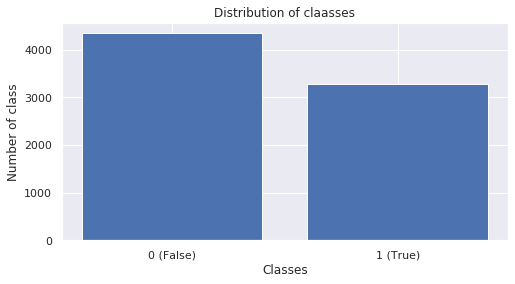

In [6]:
# Plot distribution of classes
plot_classes_layout(df_train, 'target')

**There is no class imbalance issue in this classification problem.**

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [55]:
def remove_punctuation(text):
    """Remove punctuations in text."""
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [56]:
# Remove punctuation of tweets
df_train['text'] = df_train['text'].apply(remove_punctuation)
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1


In [57]:
# extract the stopwords from nltk library
sw = stopwords.words('english')
# display the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [58]:
def remove_stopword(text):
    """Remove stopwards in text."""
    # remove the stop words and lowercase the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [60]:
# Remove stopwords of tweets
df_train['text'] = df_train['text'].apply(remove_stopword)
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [61]:
# create an object of stemming function
SBStemmer = SnowballStemmer("english")

In [62]:
def stem_word(text):    
    """Stem each word based on word root in the given text."""
    text = [SBStemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [63]:
# Stem words in tweets
df_train['text'] = df_train['text'].apply(stem_word)
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1
3,6,NaN,NaN,13000 peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1


In [64]:
# Create vectorizer object for this binary problem
vectorizer = CountVectorizer(binary=True)

In [81]:
# Vectorize text
X_csr_matrix = vectorizer.fit_transform(df_train['text'])
# 'scipy.sparse.csr.csr_matrix' --> 'numpy.matrix'
X = X_csr_matrix#.toarray()
# Targets
y = df_train['target'].values
print('Type of X:', type(X))
print('Type of y:', type(y))

Type of X: <class 'scipy.sparse.csr.csr_matrix'>
Type of y: <class 'numpy.ndarray'>


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [82]:
# Train and test datasets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model 
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# Model prediction
y_pred = lr.predict(X_test)

# Performance f1 score
f1score = f1_score(y_test, y_pred)
print(f'Model (Logistic Regression) F1 Score: {f1score * 100:.2f}%')

Model (Logistic Regression) F1 Score: 74.85 %


In [78]:
# Predict test tweets
X_test = vectorizer.transform(df_test['text']).toarray()
y_test_pred = lr.predict(X_test)

(3263,)

In [80]:
# Save submissin file
df_sub = pd.read_csv('sample_submission.csv')
df_sub['target'] = y_test_pred
df_sub.to_csv('submission.csv', index=False)
df_sub.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
